In [1]:
%%capture
# Import Libraries
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import spacy
from spacy import displacy
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
load_dotenv()
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Reading api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch Bitcoin News Articles

btc_headlines = newsapi.get_everything(q= "bitcoin", language="en", sort_by="relevancy")


In [6]:
# Fetch Ethereum News Articles

eth_headlines = newsapi.get_everything(q='ethereum', language="en", sort_by="relevancy")


In [7]:
def get_sentiment_score(article, based_on):
    sentiments = []
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                based_on : text,
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos
            })
        except AttributeError:
            pass
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [8]:
btc_sentiment_df = get_sentiment_score(btc_headlines, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...
1,0.5859,0.000,0.873,0.127,"As it promised earlier this year, Tesla now ac..."
2,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...
3,0.2023,0.000,0.950,0.050,Tesla made headlines earlier this year when it...
4,0.6075,0.102,0.719,0.178,National Burrito Day lands on April Fools Day ...
5,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
6,-0.5106,0.142,0.858,0.000,The hacker behind last years big Twitter hack\...
7,0.3612,0.000,0.933,0.067,It seems like everyone is making money off of ...
8,0.0000,0.000,0.000,0.000,
9,0.7717,0.051,0.709,0.240,Data centers and bitcoin mining operations are...


In [9]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_headlines, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...
2,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...
3,0.0000,0.000,1.000,0.000,Payment card network Visa has announced that t...
4,-0.4019,0.080,0.920,0.000,"Move fast, break things, get hacked.\r\nThat’s..."
5,0.5650,0.093,0.735,0.172,The NFT craze has been an intriguing moment fo...
6,-0.1531,0.062,0.938,0.000,Here's everything you need to know about non-f...
7,0.4767,0.000,0.916,0.084,OpenSea has been one of a handful of NFT marke...
8,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...
9,0.4754,0.000,0.917,0.083,"MetaMask, one of the most popular web wallets ..."


In [10]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.155100,0.028250,0.858750,0.063000
std,0.366983,0.047327,0.220311,0.072651
min,-0.557400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.853000,0.000000
50%,0.064400,0.000000,0.918500,0.056500
75%,0.361200,0.054500,0.970750,0.076500
max,0.771700,0.142000,1.000000,0.240000


In [11]:
# Describe the Ethereum Sentiment\
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.076775,0.039200,0.905850,0.055000
std,0.363263,0.048192,0.075404,0.055723
min,-0.557400,0.000000,0.735000,0.000000
25%,-0.177325,0.000000,0.856000,0.000000
50%,0.012900,0.000000,0.921000,0.063500
75%,0.401900,0.080750,0.944500,0.083250
max,0.680800,0.145000,1.000000,0.172000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC has the highest mean positive score (BTC mean positive 0.063000, ETH mean highest positive 0.055000

Q: Which coin had the highest compound score?

A: BTC has the highest compound score (BTC 0.771700, ETH 0.680800)

Q. Which coin had the highest positive score?

A: BTC has the highest positive score (BTC 0.240000, ETH 0.172000)

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
   
        
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
           
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    return lem

tokenizer(btc_sentiment_df.iloc[0]['content'])

['whether',
 'youre',
 'looking',
 'make',
 'larger',
 'investment',
 'want',
 'dabble',
 'cryptocurrencies',
 'purchase',
 'bitcoin',
 'ethereum',
 'bitcoin',
 'cash',
 'litecoin',
 'paypal',
 'soon',
 'youll',
 'ab',
 '3818',
 'char']

In [15]:
# Create a new tokens column for bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content,tokens
0,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, youre, looking, make, larger, invest..."
1,0.5859,0.000,0.873,0.127,"As it promised earlier this year, Tesla now ac...","[promised, earlier, year, tesla, accepts, paym..."
2,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...,"[inevitable, happened, purchase, tesla, vehicl..."
3,0.2023,0.000,0.950,0.050,Tesla made headlines earlier this year when it...,"[tesla, made, headline, earlier, year, took, s..."
4,0.6075,0.102,0.719,0.178,National Burrito Day lands on April Fools Day ...,"[national, burrito, day, land, april, fool, da..."
5,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
6,-0.5106,0.142,0.858,0.000,The hacker behind last years big Twitter hack\...,"[hacker, behind, last, year, big, twitter, hac..."
7,0.3612,0.000,0.933,0.067,It seems like everyone is making money off of ...,"[seems, like, everyone, making, money, nfts, n..."
8,0.0000,0.000,0.000,0.000,,[]
9,0.7717,0.051,0.709,0.240,Data centers and bitcoin mining operations are...,"[data, center, bitcoin, mining, operation, bec..."


In [16]:
# Create a new tokens column for ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christie, sold, first,..."
2,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, youre, looking, make, larger, invest..."
3,0.0000,0.000,1.000,0.000,Payment card network Visa has announced that t...,"[payment, card, network, visa, announced, tran..."
4,-0.4019,0.080,0.920,0.000,"Move fast, break things, get hacked.\r\nThat’s...","[move, fast, break, thing, get, hackedthats, h..."
5,0.5650,0.093,0.735,0.172,The NFT craze has been an intriguing moment fo...,"[nft, craze, intriguing, moment, digital, arti..."
6,-0.1531,0.062,0.938,0.000,Here's everything you need to know about non-f...,"[here, everything, need, know, nonfungible, to..."
7,0.4767,0.000,0.916,0.084,OpenSea has been one of a handful of NFT marke...,"[opensea, one, handful, nft, marketplace, expl..."
8,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...,"[nfts, latest, cryptocurrency, rage, day, band..."
9,0.4754,0.000,0.917,0.083,"MetaMask, one of the most popular web wallets ...","[metamask, one, popular, web, wallet, cryptocu..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(btc_sentiment_df)
eth_tokens = get_token(eth_sentiment_df)

In [19]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [40]:
bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('whether', 'youre'): 1,
 ('youre', 'looking'): 1,
 ('looking', 'make'): 1,
 ('make', 'larger'): 1,
 ('larger', 'investment'): 1,
 ('investment', 'want'): 1,
 ('want', 'dabble'): 1,
 ('dabble', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'purchase'): 1,
 ('purchase', 'bitcoin'): 1,
 ('bitcoin', 'ethereum'): 1,
 ('ethereum', 'bitcoin'): 1,
 ('bitcoin', 'cash'): 1,
 ('cash', 'litecoin'): 1,
 ('litecoin', 'paypal'): 1,
 ('paypal', 'soon'): 1,
 ('soon', 'youll'): 1,
 ('youll', 'ab'): 1,
 ('ab', '3818'): 1,
 ('3818', 'char'): 1,
 ('char', 'promised'): 1,
 ('promised', 'earlier'): 1,
 ('earlier', 'year'): 2,
 ('year', 'tesla'): 1,
 ('tesla', 'accepts'): 1,
 ('accepts', 'payment'): 1,
 ('payment', 'bitcoin'): 1,
 ('bitcoin', 'according'): 1,
 ('according', 'tesla'): 2,
 ('tesla', 'website'): 1,
 ('website', 'tweet'): 1,
 ('tweet', 'ceo'): 1,
 ('ceo', 'elon'): 1,
 ('elon', 'musk'): 2,
 ('musk', 'subsequent'): 1,
 ('subsequent', 'tweet'): 1,
 ('tweet', 'musk'): 1,
 ('musk', 'said'): 1,
 ('sa

In [21]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('one', 'strictest'): 1,
 ('strictest', 'crackdown'): 1,
 ('crackdown', 'worldwidephoto'): 1,
 ('worldwidephoto', 'michele'): 1,
 ('michele', 'doying'): 1,
 ('doying', 'vergeindia'): 1,
 ('vergeindia', 'reportedly'): 1,
 ('reportedly', 'moving'): 1,
 ('moving', 'forward'): 1,
 ('forward', 'sweeping'): 1,
 ('sweeping', 'ban'): 1,
 ('ban', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'according'): 1,
 ('according', 'reuters'): 1,
 ('reuters', 'country'): 1,
 ('country', 'legislat'): 1,
 ('legislat', '1656'): 1,
 ('1656', 'char'): 1,
 ('char', 'famed'): 1,
 ('famed', 'auction'): 1,
 ('auction', 'house'): 1,
 ('house', 'christie'): 1,
 ('christie', 'sold'): 1,
 ('sold', 'first'): 1,
 ('first', 'purely'): 1,
 ('purely', 'digital'): 1,
 ('digital', 'piece'): 1,
 ('piece', 'art'): 1,
 ('art', 'whopping'): 1,
 ('whopping', '69'): 1,
 ('69', 'million'): 1,
 ('million', 'price'): 1,
 ('price', 'buyer'): 1,
 ('buyer', 'got'): 1,
 ('got', 'digital'): 1,
 ('digital', 'file'): 1,
 ('file', 'collag

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('char', 19),
 ('bitcoin', 14),
 ('reuters', 8),
 ('tesla', 7),
 ('according', 5),
 ('year', 4),
 ('stafffile', 4),
 ('photo', 4),
 ('virtual', 4),
 ('currency', 4)]

In [24]:
# Get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('char', 19),
 ('cryptocurrency', 8),
 ('reuters', 7),
 ('new', 7),
 ('digital', 5),
 ('payment', 5),
 ('cryptocurrencies', 4),
 ('million', 4),
 ('bitcoin', 4),
 ('company', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0,10.0]

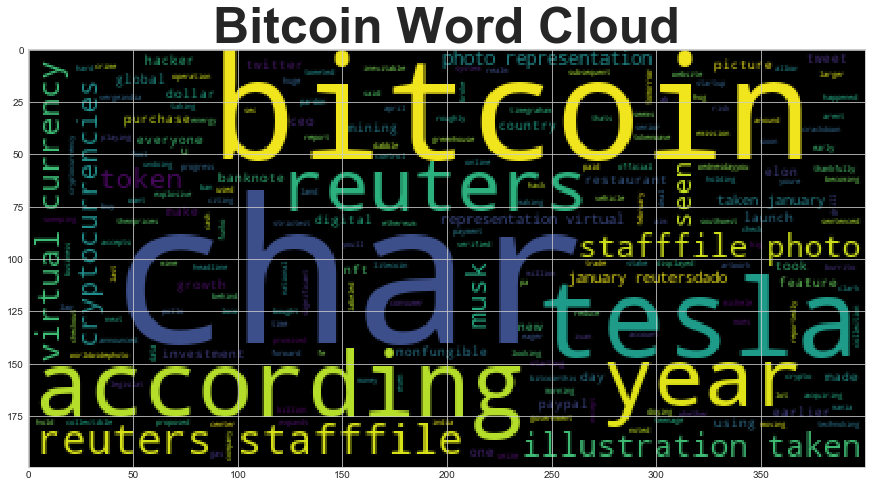

In [26]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

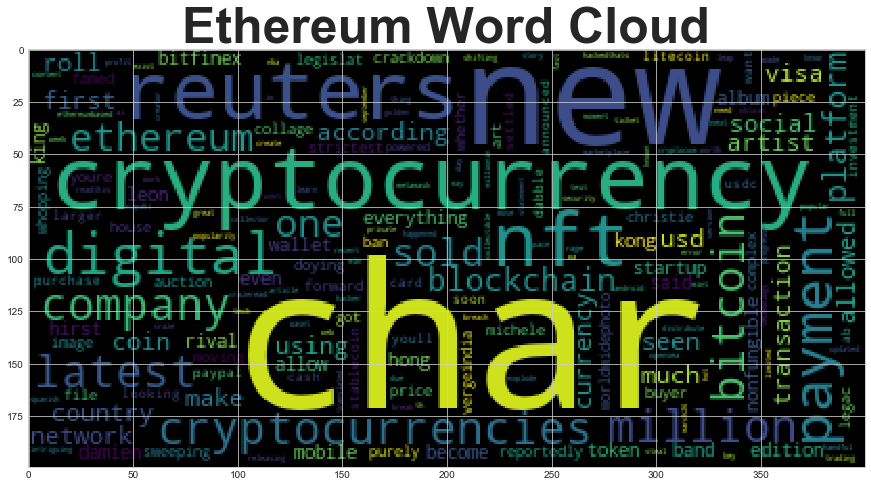

In [27]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Ethereum Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [31]:
# Concatenate all of the bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])
btc_content

'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars] The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars] Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC … [+2071 chars] National Burrito Day lands on April Fools Day this year, but thankfully restaurants arent playing around with their deals. Start

In [32]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Bitcoin GPE
Ethereum GPE
Bitcoin Cash GPE
Litecoin PERSON
earlier this year DATE
Tesla ORDINAL
Bitcoin GPE
Tesla ORG
Elon Musk ORG
Musk ORG
Bitcoin GPE
Tesla ORDINAL
Tesla ORDINAL
Bitcoin GPE
Tesla ORDINAL
Technoking Elon Musk ORG
Wednesday DATE
Tesla WORK_OF_ART
Tesla ORDINAL
earlier this year DATE
bitcoin GPE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
National Burrito Day DATE
April Fools Day this year DATE
tomorrow DATE
Pollo Loco ORG
One CARDINAL
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter ORG
Graham Ivan Clark PERSON
Twitters NORP
India GPE
Reuters ORG
this morning TIME
Checkout PERSON
Crypto PERSON
millions CARDINAL
Funko PERSON
NFT ORG
TokenWave ORG
Reuters ORG
Dec. 8, 2017 DATE
REUTERS/Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
January 21, 2021 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
the Covid-19 era DATE
March DATE
23, 2021 DATE
3 mi

---

## Ethereum NER

In [35]:
# Concatenate all of the bitcoin text together
eth_content = ' '.join(eth_sentiment_df['content'])
eth_content

'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars] Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] Payment card network Visa has announced that transactions can be settled using USD Coin (USDC), a stablecoin powered by the Ethereum blockchain. Crypto.com is the first company to test the new capabi… [+2187 chars] Move fast, break things, get hacked.\r\nThat’s what happened at Roll, the social currency platform that allows creators to mint and di

In [36]:
# Run the NER processor on all of the text
doc = nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"


In [37]:
# Render the visualization
displacy.render(doc, style='ent')

In [38]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

One CARDINAL
Michele Doying PERSON
India GPE
Reuters ORG
Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Bitcoin GPE
Ethereum GPE
Bitcoin Cash GPE
Litecoin PERSON
Visa ORG
USD Coin ORG
Ethereum ORG
Crypto.com ORG
first ORDINAL
Roll PERSON
NFT ORG
OpenSea ORG
one CARDINAL
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
Leon PERSON
NBA ORG
millions CARDINAL
Android PERSON
September 2020 DATE
about $5.7 million MONEY
March DATE
26, 2021 DATE
1 min QUANTITY
Spanish NORP
AI GPE
New York Times ORG
Cryptocurrency ORG
Bitfinex PERSON
Bitfinex Pay PERSON
millions of dollars MONEY
Reuters ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
India GPE
Reuters ORG
Damien Hirst PERSON
Chris Young PERSON
Superstar ORG
Damien Hirst PERSON
Reuters ORG
Reuters ORG
Elrond ORDINAL
Bitcoin GPE
this month DATE
Kings PERSON
more than $2 million MONEY
Reuters ORG
Visa Inc ORG
Monday DATE
USD Coin ORG
